In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [112]:
train = pd.read_csv('train.csv')

In [113]:
test = pd.read_csv('test.csv')

In [114]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
train_y = train.label
#train_y = np_utils.to_categorical(train_y)
train_y.shape

(42000,)

In [117]:
train_X = train.iloc[:,1:]
train_X.shape

(42000, 784)

In [118]:
# Take all the value for reshaping -1, dimension (28,28), colour 1
train_X = train_X.values.reshape(-1,28,28)
test_X = test.values.reshape(-1,28,28)
train_X.shape

(42000, 28, 28)

In [119]:
test_X = test.values.reshape(-1,28,28)
test_X.shape

(28000, 28, 28)

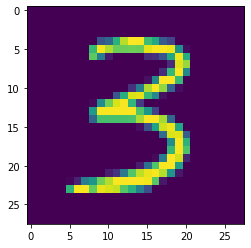

In [120]:
plt.imshow(train_X[9])
plt.imshow(test_X[9])

In [121]:
train_X = train_X.reshape((42000, 28, 28, 1))
test_X = test_X.reshape((28000, 28, 28, 1))

In [122]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs['accuracy'] == 1.0):
      print("Accuracy is at max, ending the epochs")
      self.model.stop_training = True

In [123]:


callbacks = MyCallBack()

In [124]:
def augmented_data(x_data, y_data, batch_size):
  train_datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.15,height_shift_range=0.15, zoom_range=0.15,
                  shear_range = 0.1)
  train_datagen.fit(x_data)
  train_generator = train_datagen.flow(x_data, y_data, batch_size=batch_size, shuffle=True)
  return train_generator


In [156]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), padding = 'same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (5,5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [157]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [158]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state=0, test_size=0.2)

In [159]:
aug_data = augmented_data(X_train, y_train, batch_size=128)

In [160]:
history = model.fit(aug_data, epochs=10, steps_per_epoch=int(len(X_train)/128), 
                 validation_data=(X_test, y_test), callbacks=[callbacks], )

Epoch 1/10
262/262 [==============================] - 10s 38ms/step - loss: 0.4380 - accuracy: 0.8606 - val_loss: 0.1168 - val_accuracy: 0.9723
Epoch 2/10
262/262 [==============================] - 10s 38ms/step - loss: 0.1343 - accuracy: 0.9598 - val_loss: 0.0707 - val_accuracy: 0.9799
Epoch 3/10
262/262 [==============================] - 10s 38ms/step - loss: 0.1081 - accuracy: 0.9680 - val_loss: 0.0612 - val_accuracy: 0.9819
Epoch 4/10
262/262 [==============================] - 10s 38ms/step - loss: 0.0871 - accuracy: 0.9742 - val_loss: 0.0595 - val_accuracy: 0.9830
Epoch 5/10
262/262 [==============================] - 10s 38ms/step - loss: 0.0726 - accuracy: 0.9785 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 6/10
262/262 [==============================] - 10s 38ms/step - loss: 0.0672 - accuracy: 0.9800 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 7/10
262/262 [==============================] - 10s 37ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0493 - val_accuracy:

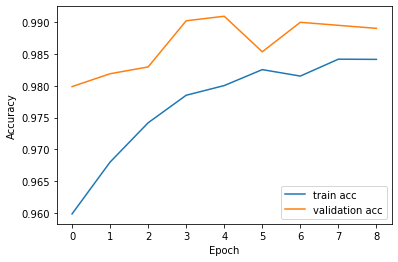

In [161]:

plt.plot(history.history['accuracy'][1:], label='train acc')
plt.plot(history.history['val_accuracy'][1:], label='validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [162]:
aug_train_data = augmented_data(train_X, train_y, 128)
history = model.fit(aug_train_data, epochs=30, steps_per_epoch=int(len(train_X)/128), callbacks=[callbacks])

Epoch 1/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0538 - accuracy: 0.9840
Epoch 2/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0459 - accuracy: 0.9869
Epoch 3/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0434 - accuracy: 0.9872
Epoch 4/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0455 - accuracy: 0.9876
Epoch 5/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0394 - accuracy: 0.9890
Epoch 6/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0381 - accuracy: 0.9888
Epoch 7/30
328/328 [==============================] - 12s 36ms/step - loss: 0.0386 - accuracy: 0.9888
Epoch 8/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0401 - accuracy: 0.9883
Epoch 9/30
328/328 [==============================] - 12s 35ms/step - loss: 0.0390 - accuracy: 0.9890
Epoch 10/30
328/328 [==============================] - 12s 35ms/step - loss: 0.033

In [163]:
pred_y = model.predict(test_X)
pred_y = np.argmax(pred_y, axis=1)

In [164]:
out_df = pd.read_csv('sample_submission.csv')
out_df.Label = pred_y
out_df.to_csv("output.csv", index=False)

In [165]:
out_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
